In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics 
from statistics import mode 
from sklearn.cluster import KMeans


In [22]:
data = pd.read_csv("mushrooms.csv")

In [7]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [9]:
most_fre = mode(data['stalk-root'])
print(most_fre)

b


In [11]:
for i in range(0, len(data['stalk-root']),1):
    if data['stalk-root'][i] == "?":
        data['stalk-root'][i] = most_fre

Here we impute the missing value with most frequent value on that colum 

<AxesSubplot:xlabel='class', ylabel='count'>

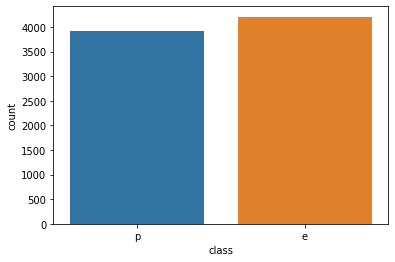

In [13]:
sns.countplot(data['class'])

In [15]:
# def createNumericalAttributes(attributes,data):
#     dictionaryForTransfer = {}
#     for i in range(0,len(attributes),1):
#         dictionaryForTransfer.update({attributes[i]:i/len(attributes)})
#     for i in range(len(data)):
#         data[i] = dictionaryForTransfer[data[i]]
#     print(data)    

# data
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in data.columns:
    data[i]=le.fit_transform(data[i])
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


Here, we change nomial attributes to numerical attributes in order for clustering

In [20]:
import random
import copy
def Distance(X,Y):
    dis = 0
    for i in range(1,len(X),1):
        dis = (X[i] - Y[i])**2
    return dis**0.5
    
def Mean(X,pos):
    sum = 0
    for i in range(0,len(X),1):
        sum = sum + X[i][pos]
    return sum/len(X)

def instanceMean(X):
    a = X[0]
    for i in range(1,len(a),1):
        a[i] = Mean(X,i)
    return a
def hasDifference(X,Y):
    if len(X) > 0 and len(Y) > 0 and len(X) == len(Y):
        for i in range(0,len(X),1):
            for j in range(0,len(X[i]),1):
                if X[i][j] != Y[i][j]:
                    return True
        return False
    return True

def Cluster(k,data,Assign):
    localdata = data.copy()
    initialPoints = copy.deepcopy(Assign)
    if k > 0:
        initialPoints = []
        for i in range(0,k,1):
            a = localdata.loc[random.randrange(0,len(localdata['class']),1)]
            while (i > 0 and a[0] == initialPoints[i-1][0] )or a[0] == 'class':
                a = localdata.loc[random.randrange(0,len(localdata['class']),1)]
            initialPoints.append(a)
    # print(initialPoints)    
    for i in range(1,len(localdata['class']),1):
        distance = Distance(localdata.loc[i],initialPoints[0])
        localdata.loc[i][0] = initialPoints[0][0]
        for j in range(1,len(initialPoints),1):
            if distance > Distance(localdata.loc[i],initialPoints[j]):
                distance = Distance(localdata.loc[i],initialPoints[j])
                localdata.loc[i][0] = initialPoints[j][0]

    positiveClass = []
    negativeClass = []
    for i in range(1,len(localdata['class']),1):
        if localdata.loc[i][0] == 1 :
            positiveClass.append(localdata.loc[i])
        else:
            negativeClass.append(localdata.loc[i])
    initialPoints = [instanceMean(positiveClass),instanceMean(negativeClass)]
    solution = [localdata,initialPoints,data] 
    if hasDifference(initialPoints,Assign):
        solution = Cluster(0,data,initialPoints)
    return solution

def Accuracy(X,Y):
    error = 0
    for i in range(1,len(X['class']),1):
        if X.loc[i][0] != Y.loc[i][0]:
            error = error+1
    return 1- error/len(X['class'])



cluster = Cluster(10,data,[])
accuracy = Accuracy(cluster[0],data)
referencePoint = cluster[1]
print(accuracy)
print(referencePoint)





0.5573609059576563
[class                       1
cap-shape                   3
cap-surface                 1
cap-color                   4
bruises                     0
odor                        4
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  4
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    1
stalk-surface-below-ring    1
stalk-color-above-ring      6
stalk-color-below-ring      6
veil-type                   0
veil-color                  1
ring-number                 1
ring-type                   1
spore-print-color           3
population                  3
habitat                     2
Name: 1, dtype: int64, class                       0
cap-shape                   3
cap-surface                 1
cap-color                   3
bruises                     0
odor                        4
gill-attachment             0
gill-spacing                0
gill-size                  